### Assignment 3

#### Task 1 (7 points):

* Download the data (*sonar.all-data*) from the *Sonar, Mines vs. Rocks Data Set*: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)
* Substitute the categories M and R of the last column for integers.
* Find the best parameters on the validation set using gridsearch (min. 2 parameters) for one model.
* Plot a heatmap of the parameters. Find the best set of parameters. Comment your results.
* Plot a ROC curve. Comment your results.

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
!pip install xlrd

# Import libraries
%matplotlib inline

plt.rcParams["figure.figsize"] = [16, 9]


In [2]:
# Load dataset
url = "https://people.arcada.fi/~martinel/"
df = pd.read_csv(url + 'sonar.all-data', header=None)

# Print shape
print(df.shape)

# Encoding R (Rocks) as 0 and M (Mines) as 1
cleanup_values = {60: {"R": 0, "M": 1}}
df = df.replace(cleanup_values)

# Split into input and output elements
data = df.values
X, y = data[:, :-1], data[:, -1]

# Print original, X and y shapes
df
print(X.shape, y.shape)


(208, 61)
(208, 60) (208,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [4]:
# Define model
classifier = RandomForestClassifier(random_state=0)

# Define grid params
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
}

# Define search
search = GridSearchCV(estimator=classifier,
                      param_grid=grid_param,
                      scoring='accuracy',
                      cv=5,
                      n_jobs=-1)

# Execute search
result = search.fit(X_train, y_train)

# Summarize result
print('Best Estimator: %s' % result.best_estimator_)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

df_gridsearch = pd.DataFrame(search.cv_results_)


Best Estimator: RandomForestClassifier(criterion='entropy', n_estimators=800, random_state=0)
Best Score: 0.8
Best Hyperparameters: {'criterion': 'entropy', 'n_estimators': 800}


<AxesSubplot:xlabel='param_n_estimators', ylabel='param_criterion'>

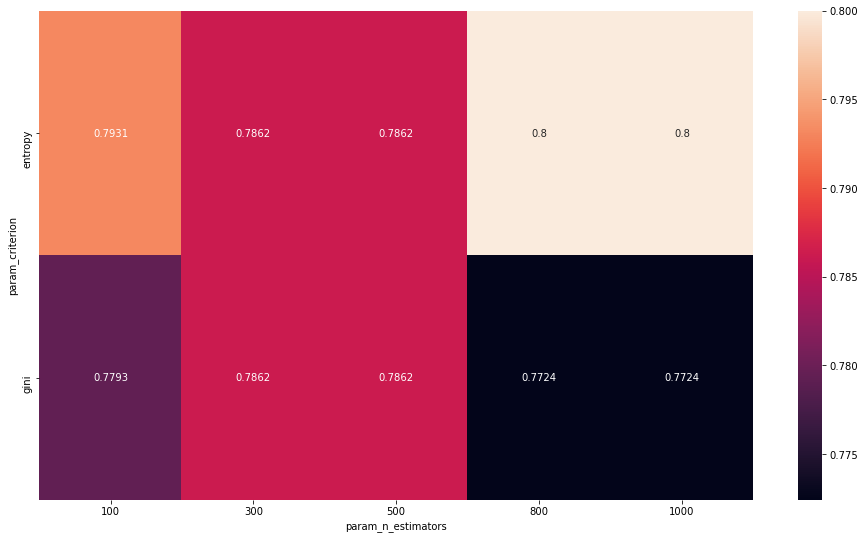

In [5]:
max_scores = df_gridsearch.groupby(['param_criterion', 'param_n_estimators']).max()
max_scores = max_scores.unstack()[['mean_test_score']]
sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g')


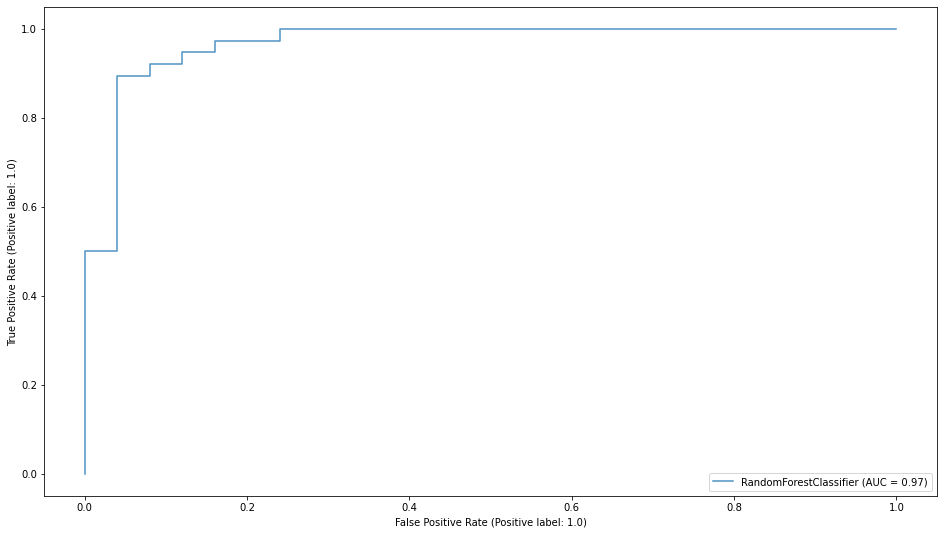

In [6]:
rfc = RandomForestClassifier(n_estimators=1000, criterion='gini', random_state=0)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
plt.show()


#### Task 2 (8 points):

Data Set Information:

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.

* Download the data from the *Cardiotocography Data Set*: https://archive.ics.uci.edu/ml/datasets/Cardiotocography
* Find the best two models by creating a complete pipeline with different parameters and algorithms. One model should predict the *morphologic pattern* and the other the *fetal state*. 
* Comment on the time and preformance metrics used in each model.